In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn 

In [5]:
hb=pd.read_csv('head_brainsize.csv')
hb.head(10)

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [7]:
hb.columns

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

In [14]:
hb.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

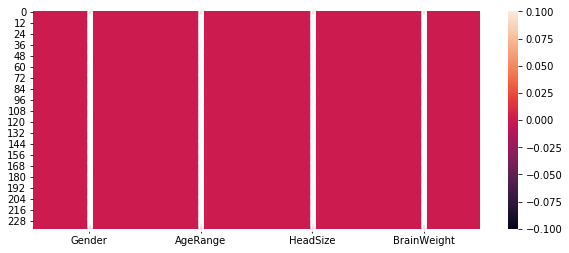

In [17]:
plt.figure(figsize=(10,4))
sns.heatmap(hb.isnull(), annot=True)

In [22]:
hb.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [23]:
hb.corr()

,Gender,AgeRange,HeadSize,BrainWeight
Gender,1.000000,-0.088652,-0.514050,-0.465266
AgeRange,-0.088652,1.000000,-0.105428,-0.169438
HeadSize,-0.514050,-0.105428,1.000000,0.799570
BrainWeight,-0.465266,-0.169438,0.799570,1.000000


In [42]:
hb.skew()

Gender         0.265554
AgeRange      -0.144748
HeadSize       0.238807
BrainWeight    0.265478
dtype: float64

(array([ 3.,  9., 20., 45., 53., 55., 27., 12.,  8.,  5.]),
 array([ 955., 1023., 1091., 1159., 1227., 1295., 1363., 1431., 1499.,
        1567., 1635.]),
 <a list of 10 Patch objects>)

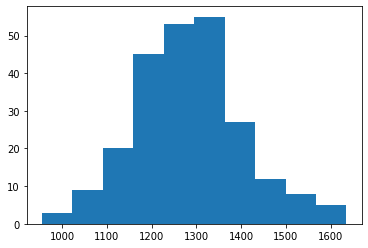

In [48]:
plt.hist(x='BrainWeight', bins=10, data=hb)

As we can see all the values are below 0.5 in above data, so no need of skewing the data.

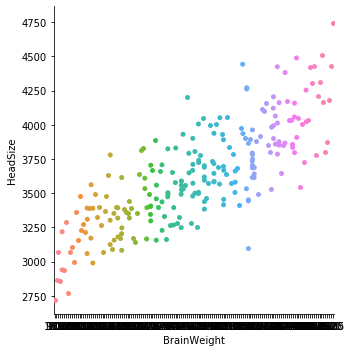

In [55]:
sns.catplot(x='BrainWeight', y='HeadSize', data=hb)

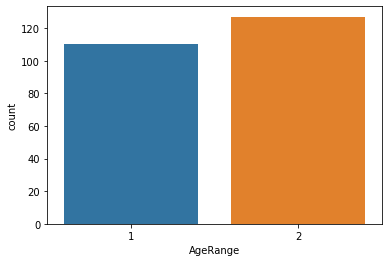

In [58]:
sns.countplot(x='AgeRange', data=hb)

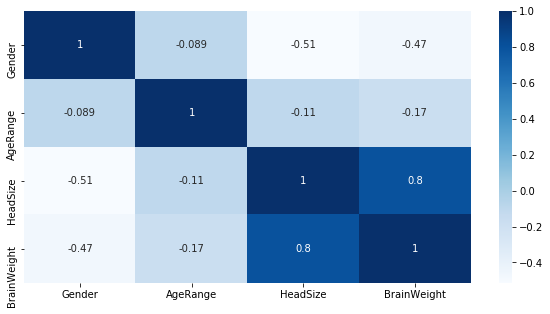

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(hb.corr(), cmap='Blues' , annot=True)

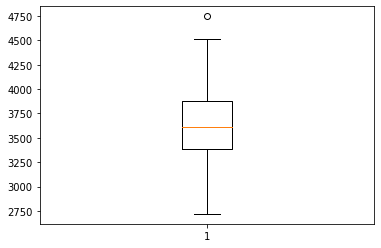

In [29]:
plt.boxplot(hb.HeadSize)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xcaa7c08>,
 'caps': [<matplotlib.lines.Line2D at 0xcaad948>,
 'boxes': [<matplotlib.lines.Line2D at 0xca9e0c8>],
 'medians': [<matplotlib.lines.Line2D at 0xcaadfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0xcab29c8>],
 'means': []}

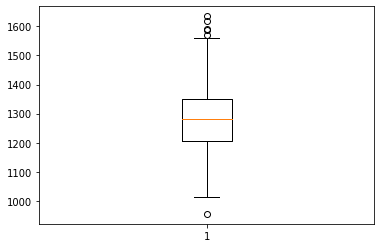

In [30]:
plt.boxplot(hb['BrainWeight'])

As we can see there as few outliers, so we will remove them by importing the zscore.

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(hb))
print(z)
print('\n')
hb_new=hb[(z<3).all(axis=1)]
hb_new.head()

[[0.8767307  1.07449777 2.40886829 2.0579083 ]
 [0.8767307  1.07449777 0.28535333 0.11763692]
 [0.8767307  1.07449777 1.72023489 0.43407603]
 [0.8767307  1.07449777 0.39235214 0.00727325]
 [0.8767307  1.07449777 1.4897759  2.557549  ]
 [0.8767307  1.07449777 0.13441126 0.14261896]
 [0.8767307  1.07449777 0.41430062 0.97535345]
 [0.8767307  1.07449777 0.2057438  0.23211156]
 [0.8767307  1.07449777 0.05759159 0.60062293]
 [0.8767307  1.07449777 0.95478182 0.76716983]
 [0.8767307  1.07449777 0.52399669 0.47571276]
 [0.8767307  1.07449777 0.98496097 0.80880656]
 [0.8767307  1.07449777 0.01648451 0.60062293]
 [0.8767307  1.07449777 1.57482624 1.99128954]
 [0.8767307  1.07449777 0.54324791 0.62349678]
 [0.8767307  1.07449777 0.66396452 1.01699018]
 [0.8767307  1.07449777 0.37584448 0.62560497]
 [0.8767307  1.07449777 0.46089482 0.0760002 ]
 [0.8767307  1.07449777 1.47875536 0.47571276]
 [0.8767307  1.07449777 2.16743507 0.97535345]
 [0.8767307  1.07449777 0.66945164 0.61727762]
 [0.8767307  

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [37]:
print(hb.shape)
print('\n')
print(hb_new.shape)

(237, 4)


(236, 4)


In [40]:
x=hb['HeadSize']
y=hb['BrainWeight']

In [66]:
x.shape

(237,)

In [67]:
y.shape

(237,)

In [86]:
x.reshape(-1,1)

array([[4512],
       [3738],
       [4261],
       [3777],
       [4177],
       [3585],
       [3785],
       [3559],
       [3613],
       [3982],
       [3443],
       [3993],
       [3640],
       [4208],
       [3832],
       [3876],
       [3497],
       [3466],
       [3095],
       [4424],
       [3878],
       [4046],
       [3804],
       [3710],
       [4747],
       [4423],
       [4036],
       [4022],
       [3454],
       [4175],
       [3787],
       [3796],
       [4103],
       [4161],
       [4158],
       [3814],
       [3527],
       [3748],
       [3334],
       [3492],
       [3962],
       [3505],
       [4315],
       [3804],
       [3863],
       [4034],
       [4308],
       [3165],
       [3641],
       [3644],
       [3891],
       [3793],
       [4270],
       [4063],
       [4012],
       [3458],
       [3890],
       [4166],
       [3935],
       [3669],
       [3866],
       [3393],
       [4442],
       [4253],
       [3727],
       [3329],
       [34

In [84]:
y.values.reshape(-1,1)

array([[1530],
       [1297],
       [1335],
       [1282],
       [1590],
       [1300],
       [1400],
       [1255],
       [1355],
       [1375],
       [1340],
       [1380],
       [1355],
       [1522],
       [1208],
       [1405],
       [1358],
       [1292],
       [1340],
       [1400],
       [1357],
       [1287],
       [1275],
       [1270],
       [1635],
       [1505],
       [1490],
       [1485],
       [1310],
       [1420],
       [1318],
       [1432],
       [1364],
       [1405],
       [1432],
       [1207],
       [1375],
       [1350],
       [1236],
       [1250],
       [1350],
       [1320],
       [1525],
       [1570],
       [1340],
       [1422],
       [1506],
       [1215],
       [1311],
       [1300],
       [1224],
       [1350],
       [1335],
       [1390],
       [1400],
       [1225],
       [1310],
       [1560],
       [1330],
       [1222],
       [1415],
       [1175],
       [1330],
       [1485],
       [1470],
       [1135],
       [13

In [87]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 2.40886829],
       [ 0.28535333],
       [ 1.72023489],
       [ 0.39235214],
       [ 1.4897759 ],
       [-0.13441126],
       [ 0.41430062],
       [-0.2057438 ],
       [-0.05759159],
       [ 0.95478182],
       [-0.52399669],
       [ 0.98496097],
       [ 0.01648451],
       [ 1.57482624],
       [ 0.54324791],
       [ 0.66396452],
       [-0.37584448],
       [-0.46089482],
       [-1.47875536],
       [ 2.16743507],
       [ 0.66945164],
       [ 1.13036962],
       [ 0.46642825],
       [ 0.20853367],
       [ 3.05360475],
       [ 2.16469151],
       [ 1.10293403],
       [ 1.06452419],
       [-0.49381754],
       [ 1.48428878],
       [ 0.41978774],
       [ 0.44447977],
       [ 1.28675251],
       [ 1.44587895],
       [ 1.43764827],
       [ 0.49386384],
       [-0.2935377 ],
       [ 0.31278892],
       [-0.82304466],
       [-0.38956228],
       [ 0.89991063],
       [-0.35389601],
       [ 1.8683871 ],
       [ 0.46642825],
       [ 0.62829825],
       [ 1

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
max_rscore=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=r_state, test_size=0.2)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test, y_pred)
    print('r2score corresponding to r_state', r_state, 'r2score is',r2_scr)
    if r2_scr>max_rscore:
        max_rscore=r2_scr
        final_rstate=r_state
        
print('\n')
print('max rscore corresponding to', final_rstate, 'is', max_rscore)
        
    

r2score corresponding to r_state 42 r2score is 0.7149168473012073
r2score corresponding to r_state 43 r2score is 0.6404165530671617
r2score corresponding to r_state 44 r2score is 0.6530109688762358
r2score corresponding to r_state 45 r2score is 0.6939862623941999
r2score corresponding to r_state 46 r2score is 0.5332650244375814
r2score corresponding to r_state 47 r2score is 0.6201411206780885
r2score corresponding to r_state 48 r2score is 0.6851449361873334
r2score corresponding to r_state 49 r2score is 0.6433491336855988
r2score corresponding to r_state 50 r2score is 0.7683161771318533
r2score corresponding to r_state 51 r2score is 0.5935686929145347
r2score corresponding to r_state 52 r2score is 0.6342022687682458
r2score corresponding to r_state 53 r2score is 0.5909146568147446
r2score corresponding to r_state 54 r2score is 0.613033190538937
r2score corresponding to r_state 55 r2score is 0.5884150240645216
r2score corresponding to r_state 56 r2score is 0.7399588791116045
r2score cor

In [94]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=5, scoring='r2').mean()

0.4936984443261272

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=50, test_size=0.2)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
print('r2_score is', r2_score(y_test,y_pred))
print('RMSE is', np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score is 0.6887976995086573
RMSE is 68.91391804194132


In [97]:
from sklearn.externals import joblib
joblib.dump(lr,'lr_Headbrain.pkl')

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['lr_Headbrain.pkl']